## Data Preparation and Data Cleaning

In [1]:
pip install pandas openpyxl

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [29]:
import missingno as msn

In [32]:
# Load the dataset
file_path = '/Users/amazon/Downloads/JOB SEARCH/HMRC/HMRC_dataset.xlsx'  
hmrc= pd.read_excel('HMRC_dataset.xlsx')
print(hmrc.head())

        Date                              Tier               RegionName  \
0 2019-01-01          Local Authority Scotland            Aberdeenshire   
1 2019-01-01                Lower Tier England                     Adur   
2 2019-01-01                Lower Tier England             Amber Valley   
3 2019-01-01          Local Authority Scotland                    Angus   
4 2019-01-01  Local Authority Northern Ireland  Antrim and Newtownabbey   

    AreaCode  AveragePrice  AveragePriceSA  SalesVolume  DetachedPrice  \
0  S12000034   182721.1033             NaN        272.0    256920.1225   
1  E07000223   315376.0876             NaN         59.0    485005.9487   
2  E07000032   170845.8316             NaN        180.0    246802.2538   
3  S12000041   139639.8976             NaN        114.0    225474.0390   
4  N09000001   139093.9475             NaN        166.0            NaN   

   SemiDetachedPrice  TerracedPrice  ...    CashPrice  CashSalesVolume  \
0        159203.2876    131112

In [4]:
print(hmrc.columns.values)

['Date' 'Tier' 'RegionName' 'AreaCode' 'AveragePrice' 'AveragePriceSA'
 'SalesVolume' 'DetachedPrice' 'SemiDetachedPrice' 'TerracedPrice'
 'FlatPrice' 'CashPrice' 'CashSalesVolume' 'MortgagePrice'
 'MortgageSalesVolume' 'FTBPrice' 'FOOPrice' 'NewPrice' 'NewSalesVolume'
 'OldPrice' 'OldSalesVolume']


In [5]:
hmrc.shape

(24300, 21)

In [6]:
hmrc.head()

,Date,Tier,RegionName,AreaCode,AveragePrice,AveragePriceSA,SalesVolume,DetachedPrice,SemiDetachedPrice,TerracedPrice,...,CashPrice,CashSalesVolume,MortgagePrice,MortgageSalesVolume,FTBPrice,FOOPrice,NewPrice,NewSalesVolume,OldPrice,OldSalesVolume
0,2019-01-01,Local Authority Scotland,Aberdeenshire,S12000034,182721.1033,NaN,272.0,256920.1225,159203.2876,131112.4604,...,171360.4653,84.0,186501.0240,188.0,145073.6191,208741.2472,204823.2125,31.0,181147.2497,241.0
1,2019-01-01,Lower Tier England,Adur,E07000223,315376.0876,NaN,59.0,485005.9487,352763.9828,299794.9512,...,313449.0293,12.0,316507.3756,47.0,266717.3218,347759.8555,337910.5849,1.0,315364.8285,58.0
2,2019-01-01,Lower Tier England,Amber Valley,E07000032,170845.8316,NaN,180.0,246802.2538,153718.5303,127325.6348,...,167790.1771,59.0,172464.9897,121.0,147976.6584,190013.9971,247986.9458,21.0,168139.1631,159.0
3,2019-01-01,Local Authority Scotland,Angus,S12000041,139639.8976,NaN,114.0,225474.0390,146174.2876,105603.3032,...,127185.5980,43.0,145641.0782,71.0,113968.6945,161698.2400,192374.7408,6.0,137507.9581,108.0
4,2019-01-01,Local Authority Northern Ireland,Antrim and Newtownabbey,N09000001,139093.9475,NaN,166.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
## Check for missing values
print("Missing values in each column:")
print(hmrc.isnull().sum())

Missing values in each column:
Date                       0
Tier                       0
RegionName                 0
AreaCode                   0
AveragePrice               0
AveragePriceSA         23400
SalesVolume              405
DetachedPrice            720
SemiDetachedPrice        720
TerracedPrice            720
FlatPrice                660
CashPrice                780
CashSalesVolume         1172
MortgagePrice            780
MortgageSalesVolume     1229
FTBPrice                 780
FOOPrice                 780
NewPrice                1133
NewSalesVolume          2870
OldPrice                1054
OldSalesVolume          1064
dtype: int64


<Axes: >

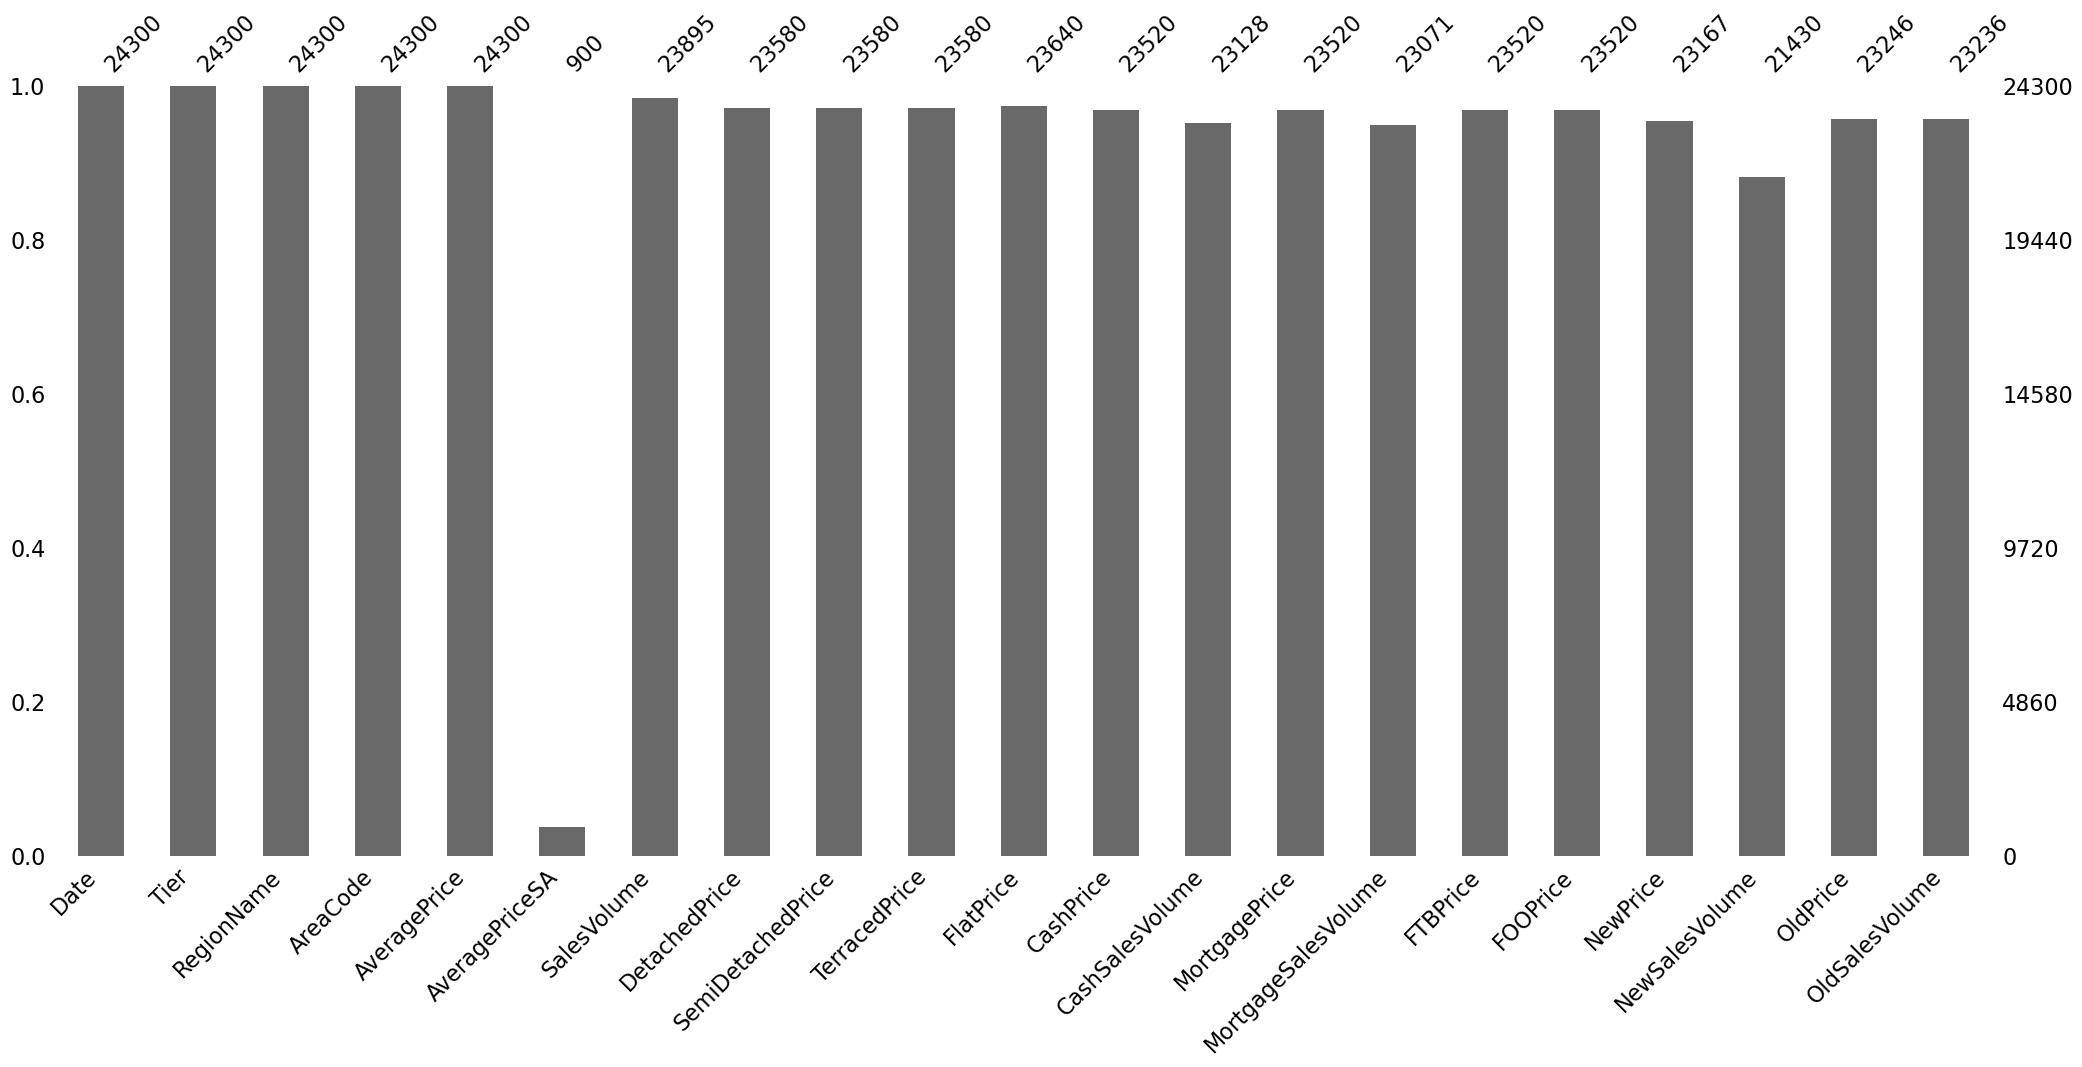

In [31]:
msn.bar(hmrc)

In [8]:
## Drop rows with missing values 
hmrc_cleaned = hmrc.dropna()
print(hmrc_cleaned)

            Date                  Tier                RegionName   AreaCode  \
113   2019-01-01        Region England             East Midlands  E12000004   
119   2019-01-01        Region England           East of England  E12000006   
124   2019-01-01       Country England                   England  E92000001   
125   2019-01-01  National Combination         England and Wales  K04000001   
146   2019-01-01  National Combination             Great Britain  K03000001   
...          ...                   ...                       ...        ...   
23792 2023-11-01        Region England                South East  E12000008   
23803 2023-11-01        Region England                South West  E12000009   
23853 2023-11-01         Country Wales                     Wales  W92000004   
23871 2023-11-01        Region England      West Midlands Region  E12000005   
23894 2023-11-01        Region England  Yorkshire and The Humber  E12000003   

       AveragePrice  AveragePriceSA  SalesVolume  D

## Exploratory Data Analysis (EDA)

In [19]:
## Summary statistics
print("Summary statistics:")
hmrc_cleaned.describe()

Summary statistics:


,Date,AveragePrice,AveragePriceSA,SalesVolume,DetachedPrice,SemiDetachedPrice,TerracedPrice,FlatPrice,CashPrice,CashSalesVolume,MortgagePrice,MortgageSalesVolume,FTBPrice,FOOPrice,NewPrice,NewSalesVolume,OldPrice,OldSalesVolume
count,826,826.000000,826.000000,826.000000,8.260000e+02,826.000000,826.000000,826.000000,826.00000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000
mean,2021-06-01 01:13:13.220338944,255346.422726,253403.879823,20662.015738,4.182959e+05,264122.619853,217347.018078,185288.104701,245898.24911,11321.112591,260474.798087,8939.600484,213937.405941,291809.402863,310885.282104,1986.732446,252703.914279,18675.283293
min,2019-01-01 00:00:00,123222.004000,120330.661500,1003.000000,2.083357e+05,125457.107500,99313.863050,84866.734230,112352.85740,313.000000,129380.124000,55.000000,105765.718900,140275.631200,181493.086700,3.000000,118283.739500,915.000000
25%,2020-03-01 00:00:00,189920.500000,185878.000000,5436.250000,3.050960e+05,188987.835000,149460.250000,127130.021150,176592.25015,1741.500000,195251.602600,1463.500000,159500.750000,218578.750000,247224.750000,414.000000,186257.454175,4990.000000
50%,2021-06-01 00:00:00,242729.740000,240754.051000,7755.500000,3.671518e+05,229076.396600,191992.465900,158366.660400,229473.39470,3185.000000,249134.500000,3891.500000,203222.095850,275852.500000,302138.141250,792.500000,238742.055800,6831.000000
75%,2022-09-01 00:00:00,297167.500000,295198.500000,12899.500000,4.539261e+05,293017.750150,246204.358600,222134.017575,280778.53410,10053.250000,305693.000000,6621.500000,247541.224075,339331.500000,361361.656950,1377.000000,294524.750000,11588.000000
max,2023-11-01 00:00:00,545059.000000,535420.000000,180759.000000,1.091931e+06,699780.000000,593785.000000,455352.000000,564980.00000,164661.000000,538434.000000,70040.000000,470441.000000,625742.000000,573071.000000,16972.000000,550461.000000,163787.000000
std,NaN,91648.880027,91766.783211,28512.502241,1.853246e+05,120678.941984,103979.267244,82478.904478,97227.83495,20971.240381,89729.327290,14300.445224,78165.600107,104413.530140,82294.774311,3073.100837,92949.725298,25691.476675


In [10]:
hmrc_cleaned.shape

(826, 21)

In [11]:
# Save cleaned dataset
hmrc_cleaned.to_csv('cleaned_HMRC_Dataset.csv', index=False)
print("Cleaned dataset saved as 'cleaned_HMRC_Dataset.csv'")

Cleaned dataset saved as 'cleaned_HMRC_Dataset.csv'


## Statistics Analysis

In [12]:
# Check Dataset info
hmrc_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 826 entries, 113 to 23894
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 826 non-null    datetime64[ns]
 1   Tier                 826 non-null    object        
 2   RegionName           826 non-null    object        
 3   AreaCode             826 non-null    object        
 4   AveragePrice         826 non-null    float64       
 5   AveragePriceSA       826 non-null    float64       
 6   SalesVolume          826 non-null    float64       
 7   DetachedPrice        826 non-null    float64       
 8   SemiDetachedPrice    826 non-null    float64       
 9   TerracedPrice        826 non-null    float64       
 10  FlatPrice            826 non-null    float64       
 11  CashPrice            826 non-null    float64       
 12  CashSalesVolume      826 non-null    float64       
 13  MortgagePrice        826 non-null   

In [13]:
# Check for Null values for uncleaned dataset
hmrc.isnull().sum()

Date                       0
Tier                       0
RegionName                 0
AreaCode                   0
AveragePrice               0
AveragePriceSA         23400
SalesVolume              405
DetachedPrice            720
SemiDetachedPrice        720
TerracedPrice            720
FlatPrice                660
CashPrice                780
CashSalesVolume         1172
MortgagePrice            780
MortgageSalesVolume     1229
FTBPrice                 780
FOOPrice                 780
NewPrice                1133
NewSalesVolume          2870
OldPrice                1054
OldSalesVolume          1064
dtype: int64

In [14]:
# Check for Null values for cleaned dataset
hmrc_cleaned.isnull().sum()

Date                   0
Tier                   0
RegionName             0
AreaCode               0
AveragePrice           0
AveragePriceSA         0
SalesVolume            0
DetachedPrice          0
SemiDetachedPrice      0
TerracedPrice          0
FlatPrice              0
CashPrice              0
CashSalesVolume        0
MortgagePrice          0
MortgageSalesVolume    0
FTBPrice               0
FOOPrice               0
NewPrice               0
NewSalesVolume         0
OldPrice               0
OldSalesVolume         0
dtype: int64

In [15]:
# Convert the Date column to datetime format
hmrc_cleaned['date'] = pd.to_datetime(df_cleaned['date'], format='%d/%m/%Y')
hmrc_cleaned.describe()

,Date,AveragePrice,AveragePriceSA,SalesVolume,DetachedPrice,SemiDetachedPrice,TerracedPrice,FlatPrice,CashPrice,CashSalesVolume,MortgagePrice,MortgageSalesVolume,FTBPrice,FOOPrice,NewPrice,NewSalesVolume,OldPrice,OldSalesVolume
count,826,826.000000,826.000000,826.000000,8.260000e+02,826.000000,826.000000,826.000000,826.00000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000
mean,2021-06-01 01:13:13.220338944,255346.422726,253403.879823,20662.015738,4.182959e+05,264122.619853,217347.018078,185288.104701,245898.24911,11321.112591,260474.798087,8939.600484,213937.405941,291809.402863,310885.282104,1986.732446,252703.914279,18675.283293
min,2019-01-01 00:00:00,123222.004000,120330.661500,1003.000000,2.083357e+05,125457.107500,99313.863050,84866.734230,112352.85740,313.000000,129380.124000,55.000000,105765.718900,140275.631200,181493.086700,3.000000,118283.739500,915.000000
25%,2020-03-01 00:00:00,189920.500000,185878.000000,5436.250000,3.050960e+05,188987.835000,149460.250000,127130.021150,176592.25015,1741.500000,195251.602600,1463.500000,159500.750000,218578.750000,247224.750000,414.000000,186257.454175,4990.000000
50%,2021-06-01 00:00:00,242729.740000,240754.051000,7755.500000,3.671518e+05,229076.396600,191992.465900,158366.660400,229473.39470,3185.000000,249134.500000,3891.500000,203222.095850,275852.500000,302138.141250,792.500000,238742.055800,6831.000000
75%,2022-09-01 00:00:00,297167.500000,295198.500000,12899.500000,4.539261e+05,293017.750150,246204.358600,222134.017575,280778.53410,10053.250000,305693.000000,6621.500000,247541.224075,339331.500000,361361.656950,1377.000000,294524.750000,11588.000000
max,2023-11-01 00:00:00,545059.000000,535420.000000,180759.000000,1.091931e+06,699780.000000,593785.000000,455352.000000,564980.00000,164661.000000,538434.000000,70040.000000,470441.000000,625742.000000,573071.000000,16972.000000,550461.000000,163787.000000
std,NaN,91648.880027,91766.783211,28512.502241,1.853246e+05,120678.941984,103979.267244,82478.904478,97227.83495,20971.240381,89729.327290,14300.445224,78165.600107,104413.530140,82294.774311,3073.100837,92949.725298,25691.476675


In [16]:
# Check the range and standard deviation of the features
features = hmrc_cleaned.select_dtypes(include=[float, int]).columns
print("\nRange of Features Before Scaling:")
hmrc_cleaned[features].apply(lambda x: x.max() - x.min())


Range of Features Before Scaling:


AveragePrice           421836.99600
AveragePriceSA         415089.33850
SalesVolume            179756.00000
DetachedPrice          883595.34350
SemiDetachedPrice      574322.89250
TerracedPrice          494471.13695
FlatPrice              370485.26577
CashPrice              452627.14260
CashSalesVolume        164348.00000
MortgagePrice          409053.87600
MortgageSalesVolume     69985.00000
FTBPrice               364675.28110
FOOPrice               485466.36880
NewPrice               391577.91330
NewSalesVolume          16969.00000
OldPrice               432177.26050
OldSalesVolume         162872.00000
dtype: float64

In [20]:
print("\nStandard Deviation of Features Before Scaling:")
hmrc_cleaned[features].std()


Standard Deviation of Features Before Scaling:


AveragePrice            91648.880027
AveragePriceSA          91766.783211
SalesVolume             28512.502241
DetachedPrice          185324.580781
SemiDetachedPrice      120678.941984
TerracedPrice          103979.267244
FlatPrice               82478.904478
CashPrice               97227.834950
CashSalesVolume         20971.240381
MortgagePrice           89729.327290
MortgageSalesVolume     14300.445224
FTBPrice                78165.600107
FOOPrice               104413.530140
NewPrice                82294.774311
NewSalesVolume           3073.100837
OldPrice                92949.725298
OldSalesVolume          25691.476675
dtype: float64

In [24]:
# Display the summary statistics after scaling
scaler = StandardScaler()
hmrc_cleaned_scaled = hmrc_cleaned.copy()
hmrc_cleaned_scaled[features] = scaler.fit_transform(hmrc_cleaned[features])
hmrc_cleaned_scaled[features]

,AveragePrice,AveragePriceSA,SalesVolume,DetachedPrice,SemiDetachedPrice,TerracedPrice,FlatPrice,CashPrice,CashSalesVolume,MortgagePrice,MortgageSalesVolume,FTBPrice,FOOPrice,NewPrice,NewSalesVolume,OldPrice,OldSalesVolume
113,-0.699930,-0.684219,-0.548794,-0.733117,-0.735126,-0.717991,-0.860137,-0.624729,-0.470983,-0.738467,-0.375922,-0.685685,-0.720328,-0.638258,-0.483757,-0.714669,-0.551189
119,0.363699,0.380640,-0.501453,0.101901,0.242624,0.215035,0.078867,0.296790,-0.457862,0.390783,-0.300704,0.333667,0.324937,0.579432,-0.450871,0.334213,-0.502583
124,-0.116882,-0.098199,1.174652,-0.236145,-0.291061,-0.201070,0.468521,-0.159481,0.218330,-0.096549,2.046098,-0.117974,-0.129145,-0.108099,1.035500,-0.127207,1.179771
125,-0.171383,-0.152592,1.282389,-0.288304,-0.330073,-0.248147,0.433679,-0.209685,0.268286,-0.152064,2.187368,-0.177402,-0.173730,-0.167342,1.077176,-0.180831,1.294353
146,-0.265731,-0.247711,1.516358,-0.342568,-0.371584,-0.296165,0.213367,-0.291189,0.370870,-0.253277,2.503424,-0.283346,-0.254097,-0.225454,1.256908,-0.274903,1.532514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23792,1.370433,1.358210,-0.530054,1.362021,1.239926,0.999930,0.472345,1.218555,-0.472796,1.435832,-0.453309,1.124277,1.469000,2.359898,-0.637766,1.343207,-0.511969
23803,0.685995,0.671620,-0.586204,0.434151,0.543625,0.479039,0.106284,0.685762,-0.481050,0.682712,-0.520411,0.594004,0.657857,1.408387,-0.638743,0.665107,-0.574168
23853,-0.441434,-0.442398,-0.663725,-0.499507,-0.454245,-0.475036,-0.556857,-0.377139,-0.517169,-0.469805,-0.571069,-0.364952,-0.405800,0.129731,-0.645906,-0.446435,-0.659345
23871,-0.080665,-0.096454,-0.623438,-0.051735,-0.159997,-0.207561,-0.435892,-0.098995,-0.507817,-0.080254,-0.529437,-0.100596,-0.061882,0.854286,-0.643952,-0.103322,-0.614867


## Specific Analysis

In [28]:
## Calculate the 12-month percentage change
hmrc_price['12_month_pct_change'] = hmrc_cleaned_scaled.groupby('region_name')['average_price'].pct_change(periods=12) * 100

## Find the region and month with the largest 12-month percentage change
max_pct_change = hmrc_cleaned_scaled['12_month_pct_change'].max()
max_pct_change_row = hmrc_cleaned_scaled[hmrc_cleaned_scaled['12_month_pct_change'] == max_pct_change]

region_max_change = max_pct_change_row['region_name'].values[0]
month_max_change = max_pct_change_row['date'].dt.strftime('%B %Y').values[0]

print(f"Region with the largest 12-month percentage change: {region_max_change}")
print(f"Month with the largest 12-month percentage change: {month_max_change}")

KeyError: 'region_name'